In [37]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets")

In [17]:
sal = pd.read_csv("Salaries.csv")

In [18]:
dum_sal = pd.get_dummies(sal,drop_first=True)

In [19]:
dia_train,dia_test = train_test_split(dum_sal,random_state=23,test_size=0.3)

In [20]:
X_train = dia_train.drop('salary',axis=1)
y_train = dia_train['salary']
X_test = dia_test.drop('salary',axis=1)
y_test = dia_test['salary']

In [22]:

#alphas = [0.01,0.15,0.5,0.75,1,2,4,2.4]
alphas = np.linspace(0.001,15,20)
scores=[]
for v in alphas:
    lasso = Lasso(alpha=v)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scr = r2_score(y_test,y_pred)
    scores.append(scr)
    print("Alpha=",v,"R2 =",scr)

Alpha= 0.001 R2 = 0.3639884598187151
Alpha= 0.790421052631579 R2 = 0.364008754818114
Alpha= 1.579842105263158 R2 = 0.3640290163802242
Alpha= 2.369263157894737 R2 = 0.36404924566853536
Alpha= 3.158684210526316 R2 = 0.3640694392784337
Alpha= 3.948105263157895 R2 = 0.36408960267277124
Alpha= 4.7375263157894745 R2 = 0.36410973083728626
Alpha= 5.5269473684210535 R2 = 0.3641298262348388
Alpha= 6.3163684210526325 R2 = 0.36414988426868866
Alpha= 7.1057894736842115 R2 = 0.36416991362435025
Alpha= 7.895210526315791 R2 = 0.36418991047675486
Alpha= 8.68463157894737 R2 = 0.3642098683202457
Alpha= 9.474052631578948 R2 = 0.364229799447223
Alpha= 10.263473684210526 R2 = 0.36424969049677347
Alpha= 11.052894736842106 R2 = 0.3642695481441597
Alpha= 11.842315789473686 R2 = 0.3642893803613484
Alpha= 12.631736842105264 R2 = 0.36430917121672957
Alpha= 13.421157894736842 R2 = 0.36432892866994593
Alpha= 14.210578947368422 R2 = 0.3643486622265376
Alpha= 15.0 R2 = 0.3643683528900451


In [42]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 3.948105263157895
Best Scores: 0.3706497090459919


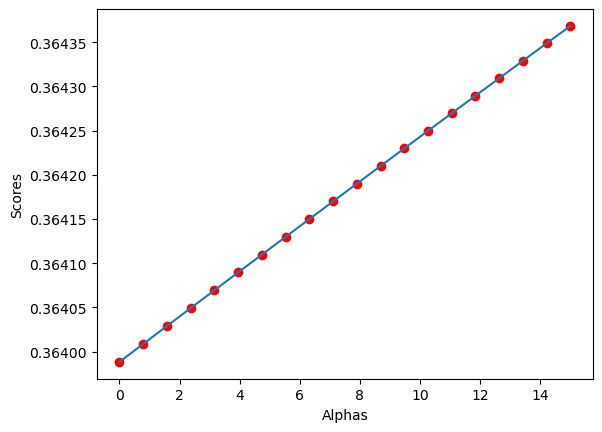

In [23]:
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()

In [34]:
alphas = [0.001,0.1,0.5,1,2]
l1_s = [0.001, 0.25,0.75]

In [35]:
cartlst = [x*y for x in alphas for y in l1_s]

In [36]:
len(cartlst)

15

In [44]:
params = []
scores=[]
for v in cartlst:
    for l1 in l1_s:
        elas = ElasticNet(alpha=v,l1_ratio=l1)
        elas.fit(X_train,y_train)
        y_pred = elas.predict(X_test)
        scr = r2_score(y_test,y_pred)
        scores.append(scr)
        params.append({'alpha':v,'l1_ratio':l1})
        print("Alpha=",v,"R2 =",scr)

Alpha= 1e-06 R2 = 0.36398893205532845
Alpha= 1e-06 R2 = 0.36398880794614275
Alpha= 1e-06 R2 = 0.3639885587261875
Alpha= 0.00025 R2 = 0.3641121446565081
Alpha= 0.00025 R2 = 0.3640814579202637
Alpha= 0.00025 R2 = 0.36401954455768926
Alpha= 0.00075 R2 = 0.364354902792009
Alpha= 0.00075 R2 = 0.36426486926653534
Alpha= 0.00075 R2 = 0.364081470706379
Alpha= 0.0001 R2 = 0.36403810633449796
Alpha= 0.0001 R2 = 0.364025749710124
Alpha= 0.0001 R2 = 0.36400089009125314
Alpha= 0.025 R2 = 0.3704449167152202
Alpha= 0.025 R2 = 0.3697410703312666
Alpha= 0.025 R2 = 0.3666470238695798
Alpha= 0.07500000000000001 R2 = 0.3655731170730989
Alpha= 0.07500000000000001 R2 = 0.36886621587133384
Alpha= 0.07500000000000001 R2 = 0.36974168541441044
Alpha= 0.0005 R2 = 0.36423429611020985
Alpha= 0.0005 R2 = 0.36417360094739926
Alpha= 0.0005 R2 = 0.36405055668784714
Alpha= 0.125 R2 = 0.3536362629005675
Alpha= 0.125 R2 = 0.36139852900823943
Alpha= 0.125 R2 = 0.37072515897247815
Alpha= 0.375 R2 = 0.30005330692850474
Alph

In [46]:
i_max = np.argmax(scores)
print("Best Alpha:",params[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: {'alpha': 0.125, 'l1_ratio': 0.75}
Best Scores: 0.37072515897247815


In [59]:
#params['alpha']
param_values=[d['alpha'] for d in params]
param_values

[1e-06,
 1e-06,
 1e-06,
 0.00025,
 0.00025,
 0.00025,
 0.00075,
 0.00075,
 0.00075,
 0.0001,
 0.0001,
 0.0001,
 0.025,
 0.025,
 0.025,
 0.07500000000000001,
 0.07500000000000001,
 0.07500000000000001,
 0.0005,
 0.0005,
 0.0005,
 0.125,
 0.125,
 0.125,
 0.375,
 0.375,
 0.375,
 0.001,
 0.001,
 0.001,
 0.25,
 0.25,
 0.25,
 0.75,
 0.75,
 0.75,
 0.002,
 0.002,
 0.002,
 0.5,
 0.5,
 0.5,
 1.5,
 1.5,
 1.5]

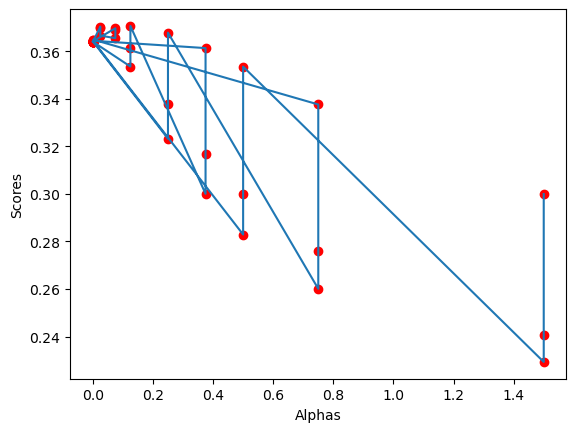

In [60]:
plt.plot(param_values,scores)
plt.scatter(param_values,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()